## Importing Libraries and Packages

In [1]:
# Data analysis and wragling
import pandas as pd
import numpy as np


# Statistics
from statistics import stdev
from scipy.stats import t

## Data Loading and Processing

In [2]:
#Importing & Mounting google drive
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [3]:
sales = pd.read_csv('/content/drive/My Drive/Dataset/sales.csv')
stock = pd.read_csv('/content/drive/My Drive/Dataset/sensor_stock_levels.csv')
temp = pd.read_csv('/content/drive/My Drive/Dataset/sensor_storage_temperature.csv')



In [4]:
sales.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [5]:
stock.head()

,Unnamed: 0,id,timestamp,product_id,estimated_stock_pct
0,0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [6]:
temp.head()

,Unnamed: 0,id,timestamp,temperature
0,0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


## Data Cleaning

Now that we have our 3 datasets successfully loaded, we need to ensure that the data is clean. Data cleaning can be a very intense task, so for this exercise, we will focus just on ensuring that the correct datatypes are present for each column, and if not, correcting them.

We can use the `.info()` method to look at data types.

In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7829 non-null   int64  
 1   transaction_id  7829 non-null   object 
 2   timestamp       7829 non-null   object 
 3   product_id      7829 non-null   object 
 4   category        7829 non-null   object 
 5   customer_type   7829 non-null   object 
 6   unit_price      7829 non-null   float64
 7   quantity        7829 non-null   int64  
 8   total           7829 non-null   float64
 9   payment_type    7829 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 611.8+ KB


In [8]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           15000 non-null  int64  
 1   id                   15000 non-null  object 
 2   timestamp            15000 non-null  object 
 3   product_id           15000 non-null  object 
 4   estimated_stock_pct  15000 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 586.1+ KB


In [9]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   23890 non-null  int64  
 1   id           23890 non-null  object 
 2   timestamp    23890 non-null  object 
 3   temperature  23890 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 746.7+ KB


Everything is okay except that the timestamp is an object which is supposed to be datetime

In [10]:
#Datetime Function
def convert_to_datetime(df, column_name):
    df[column_name] = pd.to_datetime(df[column_name])
    return df

In [11]:
#Convert to datetime, the timestamp in all dataset
sales = convert_to_datetime(sales, 'timestamp')
stock = convert_to_datetime(stock, 'timestamp')
temp = convert_to_datetime(temp, 'timestamp')



In [12]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      7829 non-null   int64         
 1   transaction_id  7829 non-null   object        
 2   timestamp       7829 non-null   datetime64[ns]
 3   product_id      7829 non-null   object        
 4   category        7829 non-null   object        
 5   customer_type   7829 non-null   object        
 6   unit_price      7829 non-null   float64       
 7   quantity        7829 non-null   int64         
 8   total           7829 non-null   float64       
 9   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 611.8+ KB


In [13]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           15000 non-null  int64         
 1   id                   15000 non-null  object        
 2   timestamp            15000 non-null  datetime64[ns]
 3   product_id           15000 non-null  object        
 4   estimated_stock_pct  15000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 586.1+ KB


In [14]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   23890 non-null  int64         
 1   id           23890 non-null  object        
 2   timestamp    23890 non-null  datetime64[ns]
 3   temperature  23890 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 746.7+ KB



## Section 5 - Merge data

Currently we have 3 datasets. In order to include all of this data within a predictive model, we need to merge them together into 1 dataframe. 

If we revisit the problem statement: 

```
“Can we accurately predict the stock levels of products, based on sales data and sensor data, 
on an hourly basis in order to more intelligently procure products from our suppliers.”
```

The client indicates that they want the model to predict on an hourly basis. Looking at the data model, we can see that only column that we can use to merge the 3 datasets together is `timestamp`.

So, we must first transform the `timestamp` column in all 3 datasets to be based on the hour of the day, then we can merge the datasets together.

In [15]:
#timestamp transformation
from datetime import datetime

def convert_timestamp_to_hourly(data: pd.DataFrame = None, column: str = None):
  dummy = data.copy()
  new_ts = dummy[column].tolist()
  new_ts = [i.strftime('%Y-%m-%d %H:00:00') for i in new_ts]
  new_ts = [datetime.strptime(i, '%Y-%m-%d %H:00:00') for i in new_ts]
  dummy[column] = new_ts
  return dummy


In [16]:
sales = convert_timestamp_to_hourly(sales, 'timestamp')
temp = convert_timestamp_to_hourly(temp, 'timestamp')
stock = convert_timestamp_to_hourly(stock, 'timestamp')


In [17]:
sales.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:00:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:00:00,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:00:00,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:00:00,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:00:00,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


Now you can see all of the `timestamp` columns have had the minutes and seconds reduced to `00`. The next thing to do, is to aggregate the datasets in order to combine rows which have the same value for `timestamp`.

For the `sales` data, we want to group the data by `timestamp` but also by `product_id`. When we aggregate, we must choose which columns to aggregate by the grouping. For now, let's aggregate quantity.

For the stock data, we are aggregating by `estimated_stock_pct` and finding the `mean`


Finally, for the temperature data, product_id does not exist in this table, so we simply need to group by timestamp and aggregate the `temperature`.

In [18]:
sales_agg = sales.groupby(['timestamp', 'product_id']).agg({'quantity': 'sum'}).reset_index()
stock_agg = stock.groupby(['timestamp', 'product_id']).agg({'estimated_stock_pct': 'mean'}).reset_index()
temp_agg = temp.groupby(['timestamp']).agg({'temperature': 'mean'}).reset_index()



In [19]:
sales_agg.head()

,timestamp,product_id,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,3
2,2022-03-01 09:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,3
3,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,7
4,2022-03-01 09:00:00,04da844d-8dba-4470-9119-e534d52a03a0,11


In [20]:
stock_agg.head()

,timestamp,product_id,estimated_stock_pct
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05


In [21]:
temp_agg.head()

,timestamp,temperature
0,2022-03-01 09:00:00,-0.028850
1,2022-03-01 10:00:00,1.284314
2,2022-03-01 11:00:00,-0.560000
3,2022-03-01 12:00:00,-0.537721
4,2022-03-01 13:00:00,-0.188734


## Merging them

In [22]:
merged_df = stock_agg.merge(sales_agg, on=['timestamp', 'product_id'], how='left')
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN


In [29]:

merged_df = merged_df.merge(temp_agg, on='timestamp', how='left')
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,-0.02885
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,-0.02885
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,-0.02885


In [30]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             3067 non-null   float64       
 4   temperature          10845 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 508.4+ KB


## Feature Engineering

We've cleaned and merged our data, and now we need to make sure it's ready for a machine learning model by transforming the columns into a numeric format. ise.

One of the columns, timestamp, isn't very useful for a machine learning model in its current form. However, since it's a datetime datatype, we can extract more useful information from it such as the day of the week, day of the month, and hour by splitting it into smaller parts.

In [33]:
merged_df['timestamp_day_of_month'] = merged_df['timestamp'].dt.day
merged_df['timestamp_day_of_week'] = merged_df['timestamp'].dt.dayofweek
merged_df['timestamp_hour'] = merged_df['timestamp'].dt.hour
merged_df.drop(columns=['timestamp'], inplace=True)
merged_df.head()

,product_id,estimated_stock_pct,quantity,temperature,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,1,1,9
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,1,1,9
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,-0.02885,1,1,9
3,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,-0.02885,1,1,9
4,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,-0.02885,1,1,9


In [34]:
#Dropping the product_id column cos its of no use to our machine learnong model
merged_df = merged_df.drop(columns=['product_id'])


In [35]:
merged_df.head()

,estimated_stock_pct,quantity,temperature,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour
0,0.89,3.0,-0.02885,1,1,9
1,0.14,3.0,-0.02885,1,1,9
2,0.67,NaN,-0.02885,1,1,9
3,0.82,NaN,-0.02885,1,1,9
4,0.05,NaN,-0.02885,1,1,9


In [55]:
# Replace NaN values with zero
merged_df.fillna(0, inplace=True)

In [56]:
# Convert the 'estimated_stock_pct', 'temperature' and 'quantity' columns from float to int
merged_df['estimated_stock_pct'] = merged_df['estimated_stock_pct'].astype(int)
merged_df['quantity'] = merged_df['quantity'].astype(int)
merged_df['temperature'] = merged_df['temperature'].astype(int)


## Modelling

To train a machine learning model, we need to split our dataset into a training set and a test set. We can use the train_test_split() method in scikit-learn to split our dataset into a training set and a test set

In [57]:
#Importing Necessary Libraries

from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# Define the features and target variable
X = merged_df[['quantity', 'temperature', 'timestamp_day_of_month', 'timestamp_day_of_week', 'timestamp_hour']]
y = merged_df['estimated_stock_pct']

In [59]:
# Initialize the machine learning model
model = LinearRegression()

# Define the number of splits for the K-fold cross-validation
k = 5

# Define the K-fold cross-validation strategy
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform K-fold cross-validation on the data and compute the mean absolute error
mae_scores = -1 * cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
mae_mean = np.mean(mae_scores)

print('Mean Absolute Error:', mae_mean)

Mean Absolute Error: 0.01608578248700286


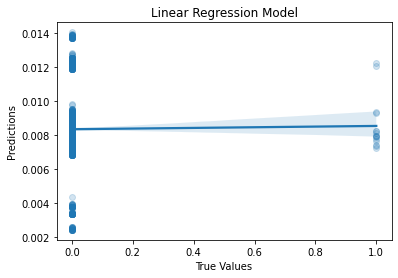

In [61]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the LinearRegression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Visualize the results
sns.regplot(x=y_test, y=model.predict(X_test), scatter_kws={'alpha':0.2})
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression Model')
plt.show()


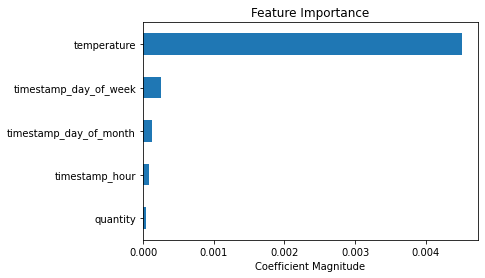

In [62]:
# Determine the importance of the features in the model
feature_importance = pd.Series(index=X.columns, data=np.abs(model.coef_))
feature_importance.sort_values().plot(kind='barh')
plt.xlabel('Coefficient Magnitude')
plt.title('Feature Importance')
plt.show()